In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from sklearn import preprocessing
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.10.0


In [2]:
data = pd.read_csv('C:\\Users\\John\\Documents\\Berkeley\\Classwork\\group project\\data\\Albert_cleaned_sets\\merged_Cannabis_Opioid_data.csv', index_col=0)

In [3]:
data.head()

,State,12 or Older Estimate Cannabis,Year,Number of Deaths Opioids
0,Alabama,404,2014,723
1,Alaska,114,2014,124
2,Arizona,752,2014,356
3,Arizona,752,2014,1211
4,California,4633,2014,4521


In [4]:
data.isna().sum()

State                            0
12 or Older Estimate Cannabis    0
Year                             0
Number of Deaths Opioids         0
dtype: int64

In [5]:
data.dtypes

State                            object
12 or Older Estimate Cannabis     int64
Year                              int64
Number of Deaths Opioids          int64
dtype: object

In [6]:
le = preprocessing.LabelEncoder()
data.State = le.fit_transform(data.State)

In [7]:
data

,State,12 or Older Estimate Cannabis,Year,Number of Deaths Opioids
0,0,404,2014,723
1,1,114,2014,124
2,2,752,2014,356
3,2,752,2014,1211
4,4,4633,2014,4521
...,...,...,...,...
342,46,959,2020,2240
343,47,1715,2020,1733
344,48,214,2020,1330
345,49,765,2020,1531


In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
train_dataset = data.sample(frac=0.8, random_state=0)
test_dataset = data.drop(train_dataset.index)

In [10]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
State,278.0,24.334532,14.765054,0.0,12.00,24.0,37.00,50.0
12 or Older Estimate Cannabis,278.0,782.363309,965.339790,51.0,200.50,468.5,988.50,7133.0
Year,278.0,2016.931655,2.012328,2014.0,2015.00,2017.0,2019.00,2020.0
Number of Deaths Opioids,278.0,1292.442446,1362.999623,43.0,329.75,808.0,1756.25,8908.0


In [11]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Number of Deaths Opioids')
test_labels = test_features.pop('Number of Deaths Opioids')


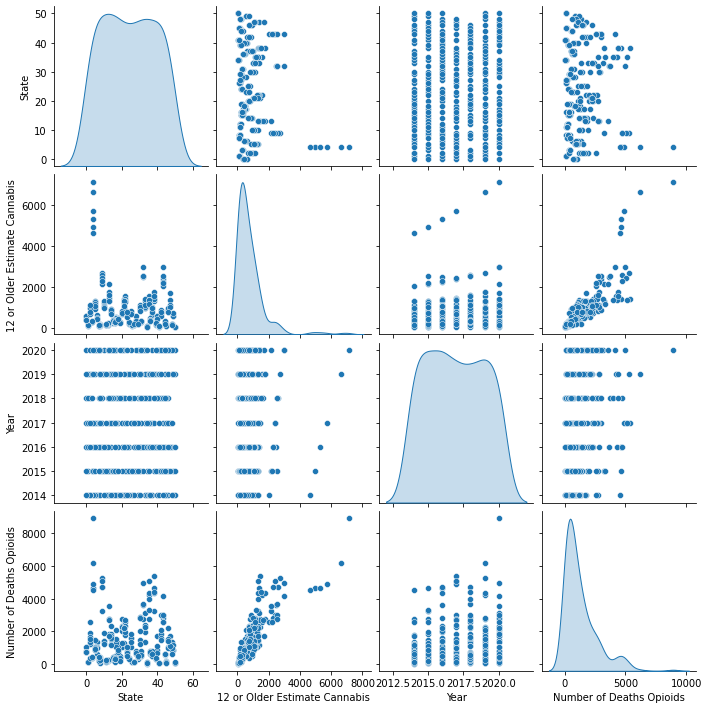

In [12]:
sns.pairplot(train_dataset[['State','12 or Older Estimate Cannabis','Year','Number of Deaths Opioids']], diag_kind='kde')

In [13]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [14]:
normalizer.adapt(np.array(train_features))

In [15]:
#Linear Regression

In [16]:
cannabis_use = np.array(train_features['12 or Older Estimate Cannabis'])

In [17]:
cannabis_use_normalizer = layers.Normalization(input_shape=[1,], axis=None)
cannabis_use_normalizer.adapt(cannabis_use)

In [18]:
cannabis_use_model = tf.keras.Sequential([
    cannabis_use_normalizer,
    layers.Dense(units=1)
])

In [19]:
cannabis_use_model.predict(cannabis_use[:10])

1/1 [==============================] - 0s 56ms/step


array([[ 0.457],
       [ 0.29 ],
       [ 0.733],
       [ 0.004],
       [ 0.909],
       [ 0.833],
       [ 0.656],
       [ 0.057],
       [-0.715],
       [ 0.029]], dtype=float32)

In [20]:
#cannabis_use_model.layers[1].kernel

In [21]:
cannabis_use_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.9),
    loss='mean_absolute_error')

In [22]:
%%time
history = cannabis_use_model.fit(
    train_features['12 or Older Estimate Cannabis'],
    train_labels,
    epochs=500,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Wall time: 11.8 s


In [23]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
495,462.706757,288.503143,495
496,462.704285,288.515625,496
497,462.690857,288.468262,497
498,462.701477,288.464203,498
499,462.691711,288.469696,499


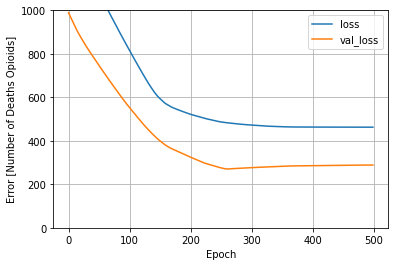

In [24]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1000])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Number of Deaths Opioids]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [25]:
test_results = {}

test_results['cannabis_use_model'] = cannabis_use_model.evaluate(
    test_features['12 or Older Estimate Cannabis'],
    test_labels, verbose=0)

In [26]:
x = tf.linspace(5000.0, 250, 300)
y = cannabis_use_model.predict(x)

10/10 [==============================] - 0s 665us/step


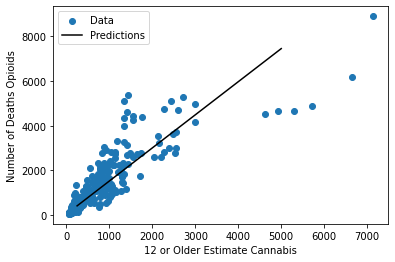

In [27]:
def plot_cannabis(x, y):
  plt.scatter(train_features['12 or Older Estimate Cannabis'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('12 or Older Estimate Cannabis')
  plt.ylabel('Number of Deaths Opioids')
  plt.legend()

plot_cannabis(x, y)

In [28]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [29]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 34ms/step


array([[ 1.608],
       [ 0.534],
       [-0.48 ],
       [ 0.316],
       [-0.302],
       [ 1.71 ],
       [ 0.097],
       [ 0.266],
       [-1.288],
       [ 0.753]], dtype=float32)

In [30]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.923],
       [-0.895],
       [-0.088]], dtype=float32)>

In [31]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.9),
    loss='mean_absolute_error')

In [32]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Wall time: 2.6 s


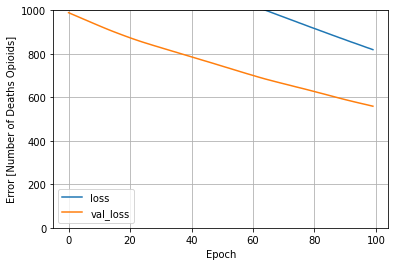

In [33]:
plot_loss(history)

In [34]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [35]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [36]:
dnn_cannabis_model = build_and_compile_model(cannabis_use_normalizer)

In [37]:
dnn_cannabis_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                128       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [38]:
%%time
history = dnn_cannabis_model.fit(
    train_features['12 or Older Estimate Cannabis'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=500)

Wall time: 12.9 s


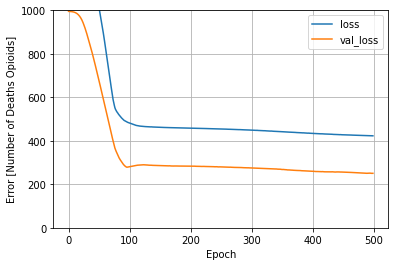

In [39]:
plot_loss(history)

In [40]:
x = tf.linspace(7500.0, 250, 1000)
y = dnn_cannabis_model.predict(x)

32/32 [==============================] - 0s 901us/step


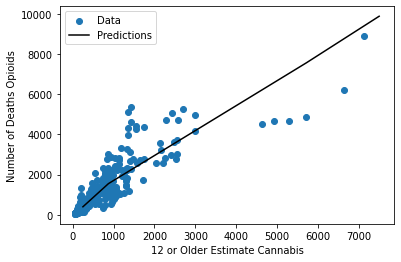

In [41]:
plot_cannabis(x, y)

In [42]:
test_results['dnn_cannabis_model'] = dnn_cannabis_model.evaluate(
    test_features['12 or Older Estimate Cannabis'], test_labels,
    verbose=0)

In [43]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 3)                7         
 n)                                                              
                                                                 
 dense_5 (Dense)             (None, 64)                256       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,488
Trainable params: 4,481
Non-trainable params: 7
_________________________________________________________________


In [44]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

Wall time: 2.8 s


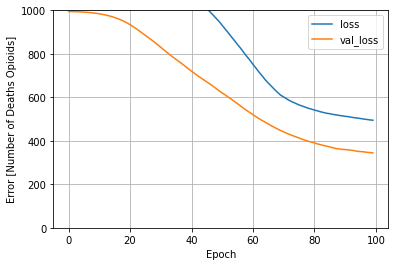

In [45]:
plot_loss(history)

In [46]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [47]:
pd.DataFrame(test_results, index=['Mean absolute error [Number of Deaths Opioids]']).T

,Mean absolute error [Number of Deaths Opioids]
cannabis_use_model,417.340515
linear_model,814.628601
dnn_cannabis_model,385.461945
dnn_model,482.143799


3/3 [==============================] - 0s 1ms/step


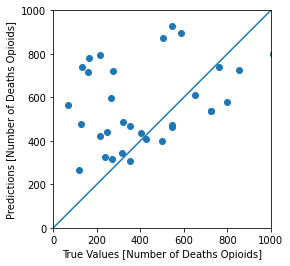

In [50]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Number of Deaths Opioids]')
plt.ylabel('Predictions [Number of Deaths Opioids]')
lims = [0, 1000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

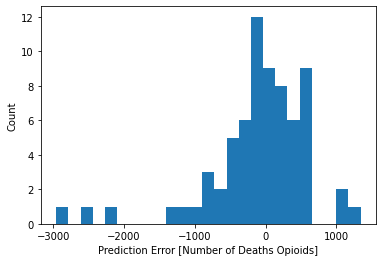

In [49]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Number of Deaths Opioids]')
_ = plt.ylabel('Count')